# Deodorant Dataset - Top Brands in India

In [5]:
# Libraries to Handle data
import numpy as np
import pandas as pd

# Libraries to Visualize dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Dataset

In [4]:
df = pd.read_csv("dataset\deodorant_dataset.csv")

In [ ]:
# Top 5 rows of the dataset
df.head()

,Brand Name,Product Name,Category,Fragrance Type,Volume (ml),Price (INR),Long-lasting (hours),Alcohol-Free,Skin-Friendly,Anti-Perspirant,...,Number of Reviews,Manufacturing Date,Expiry Date,Country of Origin,Packaging Type,Shelf Life (Months),Sales in Last Month (Units),Online Availability,Discount (%),Retailer Name
0,Nike Deodorant,Variant 29,Men,Fresh,200,265,15,No,No,Yes,...,4654,2022-01-01,2024-01-01,India,Roll-on,25,8623,Yes,20,Nykaa
1,Envy Deo,Variant 21,Men,Citrus,100,515,4,Yes,No,Yes,...,2500,2022-01-02,2024-01-02,India,Roll-on,26,3616,No,36,Flipkart
2,Nivea,Variant 3,Women,Oriental,150,249,8,Yes,No,Yes,...,3061,2022-01-03,2024-01-03,India,Spray,13,2425,No,11,Flipkart
3,Nike Deodorant,Variant 30,Unisex,Woody,250,487,12,Yes,Yes,No,...,3411,2022-01-04,2024-01-04,India,Spray,28,7509,No,15,Local Store
4,Rexona Deodorant,Variant 11,Unisex,Citrus,250,317,20,Yes,Yes,Yes,...,4473,2022-01-05,2024-01-05,India,Roll-on,18,3803,Yes,47,Local Store


In [8]:
# Number of columns and rows in the dataset

print(f"Numer of Columns: {df.shape[1]}")
print(f"Numer of Rows: {df.shape[0]}")

Numer of Columns: 21
Numer of Rows: 10000


In [9]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Brand Name                   10000 non-null  object 
 1   Product Name                 10000 non-null  object 
 2   Category                     10000 non-null  object 
 3   Fragrance Type               10000 non-null  object 
 4   Volume (ml)                  10000 non-null  int64  
 5   Price (INR)                  10000 non-null  int64  
 6   Long-lasting (hours)         10000 non-null  int64  
 7   Alcohol-Free                 10000 non-null  object 
 8   Skin-Friendly                10000 non-null  object 
 9   Anti-Perspirant              10000 non-null  object 
 10  Customer Rating              10000 non-null  float64
 11  Number of Reviews            10000 non-null  int64  
 12  Manufacturing Date           10000 non-null  object 
 13  Expiry Date      

Our dataset has two columns Manufacturing Date and Expiray data in wrong format. Now We have to convert them into datatime format

In [11]:
df['Manufacturing Date'] = pd.to_datetime(df['Manufacturing Date'])
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'])

# Check missing values

In [13]:
df.isnull().sum()

Brand Name                     0
Product Name                   0
Category                       0
Fragrance Type                 0
Volume (ml)                    0
Price (INR)                    0
Long-lasting (hours)           0
Alcohol-Free                   0
Skin-Friendly                  0
Anti-Perspirant                0
Customer Rating                0
Number of Reviews              0
Manufacturing Date             0
Expiry Date                    0
Country of Origin              0
Packaging Type                 0
Shelf Life (Months)            0
Sales in Last Month (Units)    0
Online Availability            0
Discount (%)                   0
Retailer Name                  0
dtype: int64

Our Dataset has no missing values.

In [15]:
df.duplicated().sum()

0

Our dataset has not any duplicate values

# Which brand has the highest sales in the last month (units sold)?

In [ ]:
df.groupby('Brand Name')['Sales in Last Month (Units)'].max().sort_values(ascending=False)

Brand Name
Engage Deo               10000
Nike Deodorant           10000
Rexona Deodorant          9999
Fogg Deo                  9997
Envy Deo                  9996
Nivea                     9995
Park Avenue Deodorant     9995
Denver Deo for Men        9988
Name: Sales in Last Month (Units), dtype: int64

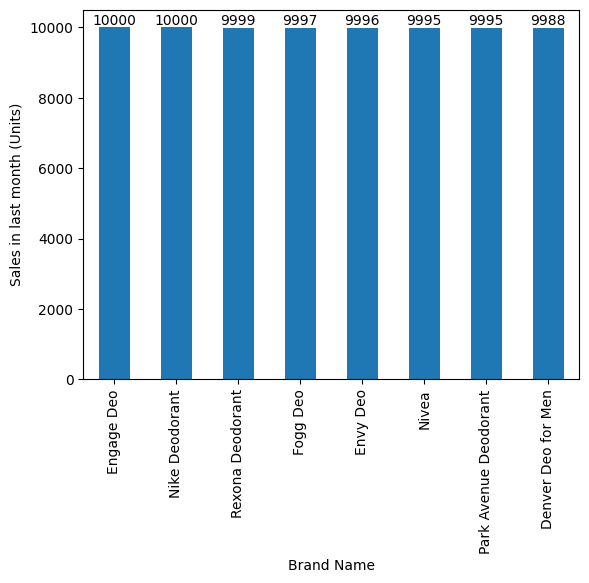

In [ ]:
ax = df.groupby('Brand Name')['Sales in Last Month (Units)'].max().sort_values(ascending=False).plot(kind='bar')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Brand Name")
plt.ylabel("Sales in last month (Units)")
plt.show()


Engage Deo      
Nike Deodorant 

These brands have highset sales in the last month as compared to others. Both have equal sales in last month.

In [26]:
import warnings
warnings.filterwarnings("ignore")

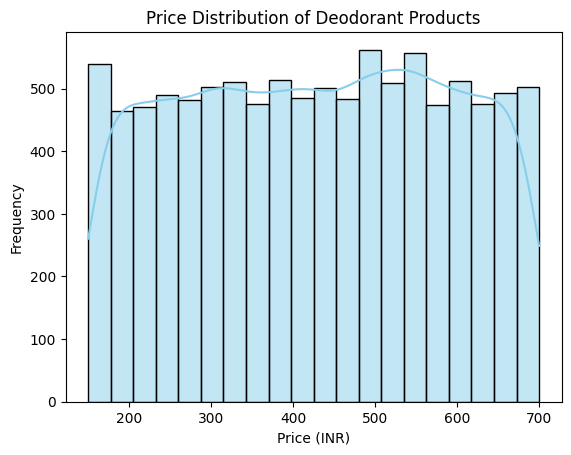

In [27]:
sns.histplot(df['Price (INR)'],bins=20,kde=True, color='skyblue')
plt.title('Price Distribution of Deodorant Products')  
plt.xlabel('Price (INR)')  
plt.ylabel('Frequency')  
plt.show()

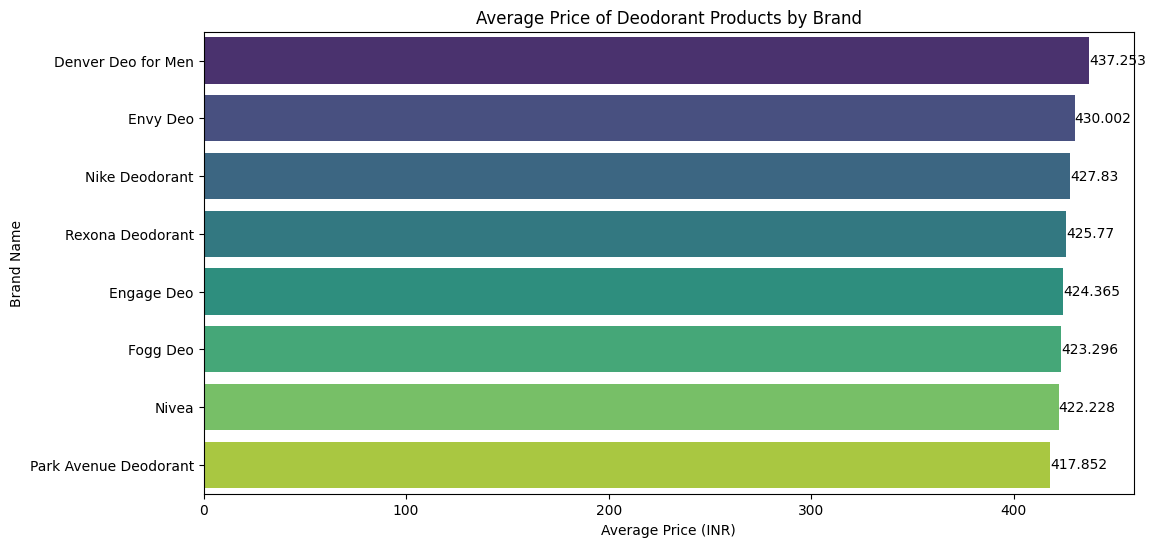

In [35]:
avg_price_per_brand = df.groupby('Brand Name')['Price (INR)'].mean().reset_index() 
avg_price_per_brand = avg_price_per_brand.sort_values(by='Price (INR)', ascending=False)
plt.figure(figsize=(12, 6))  
ax = sns.barplot(x='Price (INR)', y='Brand Name', data=avg_price_per_brand, palette='viridis')  
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Price of Deodorant Products by Brand')  
plt.xlabel('Average Price (INR)')  
plt.ylabel('Brand Name')   
plt.show()  


In [34]:
higher_price_brands = avg_price_per_brand[avg_price_per_brand['Price (INR)'] > avg_price_per_brand['Price (INR)'].mean()]  
print("Brands with higher average prices:")  
print(higher_price_brands) 

Brands with higher average prices:
           Brand Name  Price (INR)
0  Denver Deo for Men   437.253257
2            Envy Deo   430.002449
4      Nike Deodorant   427.829537


# Customer Preferences by Fragrance Type

# Which fragrance types are most popular among consumers based on the number of reviews?

In [51]:
fragrance_reviews = df.groupby('Fragrance Type')['Number of Reviews'].sum().reset_index()
fragrance_reviews = fragrance_reviews.sort_values(by = "Number of Reviews",ascending=False)
print(fragrance_reviews)

  Fragrance Type  Number of Reviews
0        Aquatic            3208095
6          Spicy            3158048
1         Citrus            3131741
3          Fresh            3120189
4         Fruity            3106918
2         Floral            3094222
5       Oriental            3088426
7          Woody            3083520


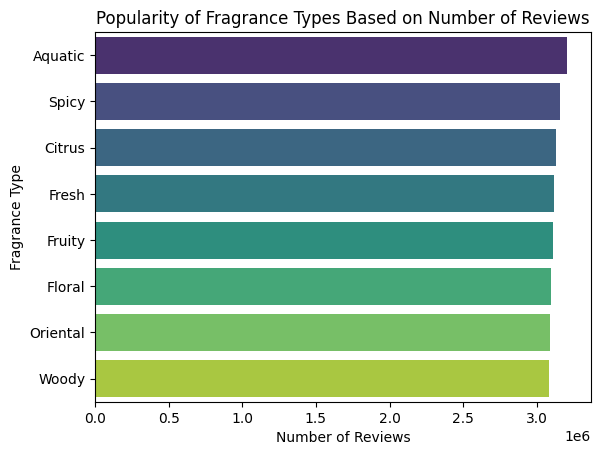

In [67]:
sns.barplot(data=fragrance_reviews, x='Number of Reviews', y='Fragrance Type', palette='viridis')
plt.title('Popularity of Fragrance Types Based on Number of Reviews')
plt.show()

# Which fragrance types are most popular among consumers based on average ratings?

In [60]:
average_rating = np.round(df.groupby('Fragrance Type')['Customer Rating'].mean(),2).reset_index()
average_rating = average_rating.sort_values(by="Customer Rating",ascending=False)
average_rating

,Fragrance Type,Customer Rating
4,Fruity,3.76
5,Oriental,3.76
1,Citrus,3.75
3,Fresh,3.75
2,Floral,3.73
6,Spicy,3.72
0,Aquatic,3.71
7,Woody,3.70


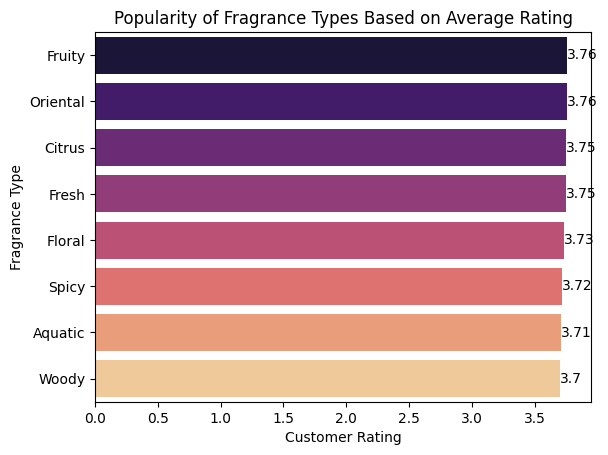

In [68]:
sns.barplot(data = average_rating , x='Customer Rating', y='Fragrance Type', palette='magma')
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i)
plt.title('Popularity of Fragrance Types Based on Average Rating')    
plt.show()

#  Does online availability impact sales in the last month?

In [75]:
sales_data = df.groupby('Online Availability')['Sales in Last Month (Units)'].sum().reset_index()

sales_data = sales_data.sort_values(by='Sales in Last Month (Units)',ascending=False)
sales_data


,Online Availability,Sales in Last Month (Units)
0,No,25491533
1,Yes,24831370


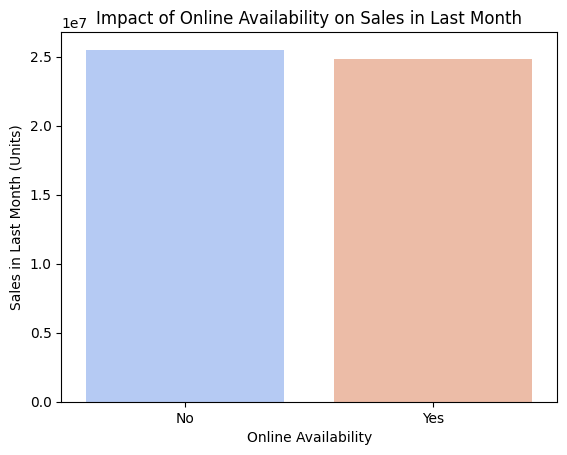

In [79]:
sns.barplot(data = sales_data, x = "Online Availability" , y = "Sales in Last Month (Units)",palette='coolwarm')
plt.title('Impact of Online Availability on Sales in Last Month')
plt.show()

# Shelf Life Analysis

What is the average shelf life of deodorants by brand?

In [90]:
shelf_life = np.round(df.groupby('Brand Name')['Shelf Life (Months)'].mean(),2).reset_index()
shelf_life = shelf_life.sort_values(by="Shelf Life (Months)",ascending=False)
shelf_life

,Brand Name,Shelf Life (Months)
3,Fogg Deo,24.43
1,Engage Deo,24.19
5,Nivea,24.18
0,Denver Deo for Men,24.11
2,Envy Deo,24.07
6,Park Avenue Deodorant,24.06
4,Nike Deodorant,23.72
7,Rexona Deodorant,23.70


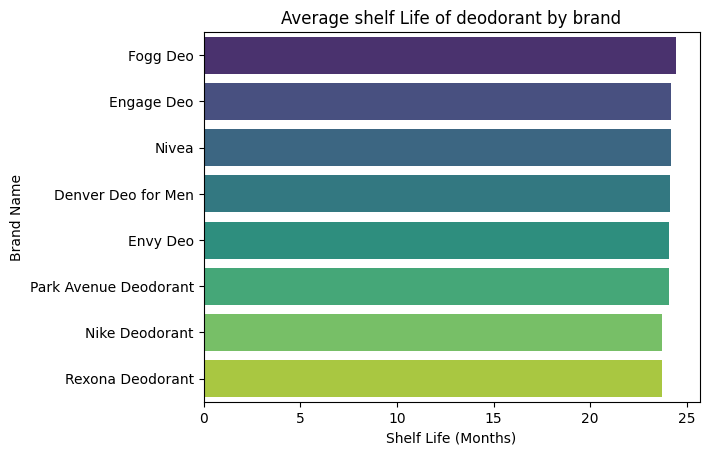

In [103]:
sns.barplot(data = shelf_life,x ="Shelf Life (Months)",y = "Brand Name", palette='viridis',orient='h')
plt.title("Average shelf Life of deodorant by brand")
plt.show()



# Top Retailers by Average Monthly Sales Volume

In [114]:
Retailer_sales = np.round(df.groupby('Retailer Name')['Sales in Last Month (Units)'].mean(),2).reset_index()
Retailer_sales = Retailer_sales.sort_values(by="Sales in Last Month (Units)",ascending=False)
Retailer_sales

,Retailer Name,Sales in Last Month (Units)
3,Myntra,5101.57
0,Amazon,5091.36
1,Flipkart,5064.18
4,Nykaa,4974.94
2,Local Store,4929.95


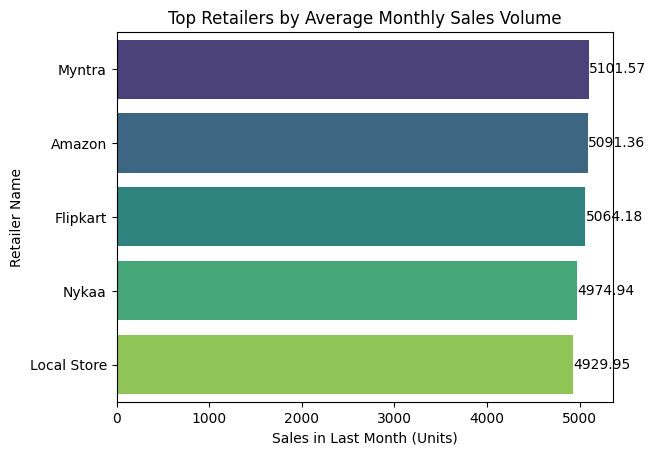

In [117]:
ax = sns.barplot(data = Retailer_sales, x = "Sales in Last Month (Units)", y ='Retailer Name',palette='viridis',orient='h')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top Retailers by Average Monthly Sales Volume")
plt.show()

# Extract Month and Year from the given data

In [125]:
df["Month Name"] = df['Manufacturing Date'].dt.month_name()
df["Year Name"] = df['Manufacturing Date'].dt.year

# Total Sales in Units by Month

In [134]:
month_by_month_sales= df.groupby("Month Name")['Sales in Last Month (Units)'].sum().reset_index().sort_values(by="Sales in Last Month (Units)",ascending=False)

month_by_month_sales

,Month Name,Sales in Last Month (Units)
7,March,4445252
4,January,4416616
0,April,4308722
8,May,4251878
10,October,4244296
5,July,4231534
1,August,4167556
2,December,4133286
9,November,4108220
11,September,4050291


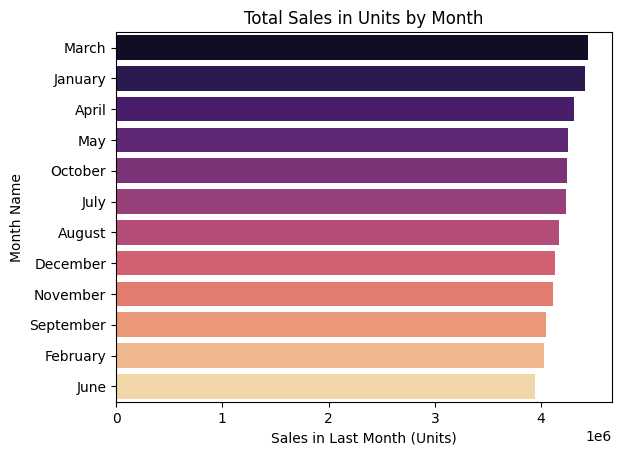

In [137]:
sns.barplot(data = month_by_month_sales , x = "Sales in Last Month (Units)", y ="Month Name" , palette='magma')
plt.title("Total Sales in Units by Month")
plt.show()